<a href="https://colab.research.google.com/github/G0nkly/Ready-Set-Prophecy/blob/main/Timeseries_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Reproduzierbarkeit
np.random.seed(42)

# Zeitachse: 2 Jahre tägliche Daten
dates = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
n = len(dates)

# Komponenten
base_level = 900
trend = np.linspace(0, 50, n)
weekly_seasonality = 40 * np.sin(2 * np.pi * dates.dayofweek / 7)
noise = np.random.normal(0, 15, n)

# Verbrauch
consumption = base_level + trend + weekly_seasonality + noise

# DataFrame
df = pd.DataFrame({
    "date": dates,
    "consumption_mwh": consumption
})

# Als CSV speichern
df.to_csv("consumption_daily.csv", index=False)

df.head()

,date,consumption_mwh
0,2022-01-01,868.453596
1,2022-01-02,866.721363
2,2022-01-03,909.852502
3,2022-01-04,954.324468
4,2022-01-05,935.759164


In [2]:
df = pd.read_csv("consumption_daily.csv", parse_dates=["date"])
df = df.set_index("date")

df.head()

,consumption_mwh
date,
2022-01-01,868.453596
2022-01-02,866.721363
2022-01-03,909.852502
2022-01-04,954.324468
2022-01-05,935.759164


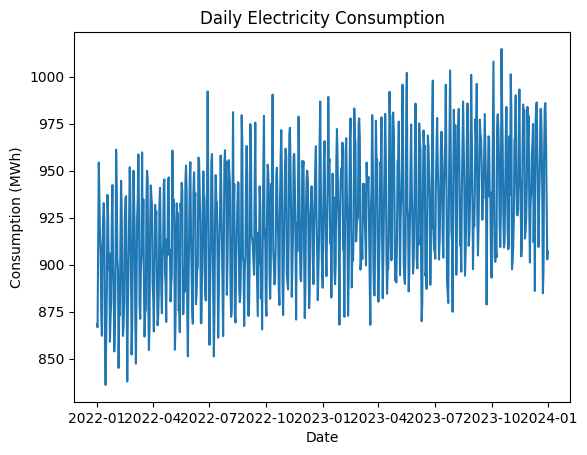

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df["consumption_mwh"])
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")
plt.show()
